<a href="https://colab.research.google.com/github/baesumin/DeepLearning/blob/main/sk%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_ver1.csv to train_ver1.csv


In [2]:
import pandas as pd
import numpy as np
import io
MyTrainset = pd.read_csv(io.StringIO(uploaded['train_ver1.csv'].decode('euc-kr')))

In [3]:
MyTrainset

,name,weight,year,chip_intel,chip_Apple,chip_AMD,cpu_M1,cpu_i3,cpu_i5,cpu_i7,cpu_i9,core,windows,used,display,pro,air,new,age,mouse,apple_care,codename,cpu(GHz),price
0,애플 JH 애플 맥북프로 13형 2019년형 MUHQ2KH/A 무배,1.000000,2019,1,0,0,0,0,0,0,0,3.66787,0,False,13,1,0,0,2,0,0,6.914557,1.8176,1483560
1,애플 애플 맥북에어13형 MVFL2KH/A 실버 (주)ipark,1.000000,2019,1,0,0,0,0,0,0,0,3.66787,0,False,13,0,1,0,2,0,0,6.914557,1.8176,5204440
2,애플 맥북프로 2019 16인치 CTO i7/64GB/1TB CTO,2.000000,2019,1,0,0,0,0,0,1,0,3.66787,0,False,16,1,0,0,2,0,0,6.914557,1.8176,3801600
3,Apple 맥북 프로 16인치 + 애플케어플러스(선택),1.470219,2018,1,0,0,0,0,0,0,0,3.66787,0,False,16,1,0,0,3,0,0,6.914557,1.8176,3190000
4,애플 맥북프로 13인치 2019년형 i5/8G/128G/256G,1.370000,2019,1,0,0,0,0,1,0,0,3.66787,0,False,13,1,0,0,2,0,0,6.914557,1.8176,1249200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,애플 맥북프로 13형 512GB Silver 터치바 - MYDC2KH/A,1.400000,2020,1,0,0,0,0,0,0,0,3.66787,0,False,13,1,0,0,1,0,0,6.914557,1.8176,1845000
2002,쏘 맥북프로레티나 SSD 쏘드라이브 업그레이드 1TB,1.470219,2018,1,0,0,0,0,0,0,0,3.66787,0,False,13,1,0,0,3,0,0,6.914557,1.8176,213520
2003,Apple [모델선택] 맥북프로 2020년 13형 실버 Macbook Pro 13 ...,1.080000,2020,1,0,0,0,0,0,0,0,3.66787,0,False,13,1,0,0,1,0,0,6.914557,1.8176,2760000
2004,맥북에어 2020년 13형 M1칩 쿼드코어 512GB CTO 가능,1.290000,2020,0,1,0,1,0,0,0,0,4.00000,0,False,13,0,1,0,1,0,0,10.000000,1.1000,1630000


In [4]:
df_y = MyTrainset.loc[:,'price']

In [5]:
df_x = MyTrainset.loc[:,(MyTrainset.columns!='price') & (MyTrainset.columns!='name') & (MyTrainset.columns!='used')]

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
tr_used = MyTrainset['used']
encoder.fit(tr_used)
tr_used = pd.DataFrame(encoder.transform(tr_used))

In [20]:
df_x['used'] = tr_used

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
from google.colab import files
uploaded = files.upload()

Saving test_ver1.csv to test_ver1.csv


In [9]:
testset = pd.read_csv(io.StringIO(uploaded['test_ver1.csv'].decode('euc-kr')))

In [10]:
testset

,name,weight,year,chip_intel,chip_Apple,chip_AMD,cpu_M1,cpu_i3,cpu_i5,cpu_i7,cpu_i9,core,windows,used,display,pro,air,new,age,mouse,apple_care,codename,cpu(GHz)
0,애플 맥북에어 2012 11인치 i5/4GB/128GB 중고맥북에어,1.000000,2012.000000,1,0,0,0,0,1,0,0,3.66787,0,True,11.000000,0,1,0,9.000000,0,0,6.914557,1.8176
1,MacBook Air 2020년형 Apple M1 칩(8코어 CPU 및 7코어 GP...,1.000000,2020.000000,0,1,0,1,0,0,0,0,3.66787,0,False,13.000000,0,1,0,1.000000,0,0,6.914557,1.8176
2,JH 애플 맥북에어 13형 2020년형 MWTJ2KH/A,1.000000,2020.000000,1,0,0,0,0,0,0,0,3.66787,0,False,13.000000,0,1,0,1.000000,0,0,6.914557,1.8176
3,맥북프로 터치바 2020년 13형 M1칩 4 256GB CTO 가능,1.000000,2020.000000,0,1,0,1,0,0,0,0,4.00000,0,False,13.000000,1,0,0,1.000000,0,0,8.000000,1.8176
4,애플 맥북에어 11인치 2011년형 i5/4G/128G,1.000000,2011.000000,1,0,0,0,0,1,0,0,3.66787,0,False,11.000000,0,1,0,10.000000,0,0,6.914557,1.8176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,"애플 맥북 프로 13인치 2019,터치바,고급형,스페이스그레이,실버,재고보유",1.370000,2019.000000,1,0,0,0,0,0,0,0,3.66787,0,False,13.000000,1,0,0,2.000000,0,0,6.914557,1.8176
498,서피스고 올뉴그램 삼성노트북9메탈 맥북프로 C타입,1.470219,2017.661017,1,0,0,0,0,0,0,0,3.66787,0,False,13.545364,1,0,0,3.338983,0,0,6.914557,1.8176
499,애플 맥북프로 2020 13인치 i5/8GB/512GB 중고맥북,1.400000,2020.000000,1,0,0,0,0,1,0,0,3.66787,0,True,13.000000,1,0,0,1.000000,0,0,6.914557,1.8176
500,애플 맥북에어 13인치 2017년형 i5/8G/128G A급,1.350000,2017.000000,1,0,0,0,0,1,0,0,3.66787,0,False,13.000000,0,1,0,4.000000,0,0,6.914557,1.8176


In [11]:
test_x = testset.loc[:,(testset.columns!='price') & (testset.columns!='name') & (testset.columns!='used')]

In [21]:
te_used = testset['used']
encoder.fit(te_used)
te_used = pd.DataFrame(encoder.transform(te_used))

In [22]:
test_x['used'] = te_used

In [ ]:
test_x

,weight,year,chip_intel,chip_Apple,chip_AMD,cpu_M1,cpu_i3,cpu_i5,cpu_i7,cpu_i9,core,windows,display,pro,air,new,age,mouse,apple_care,codename,cpu(GHz),used,name
0,1.000000,2012.000000,1,0,0,0,0,1,0,0,3.66787,0,11.000000,0,1,0,9.000000,0,0,6.914557,1.8176,1,708
1,1.000000,2020.000000,0,1,0,1,0,0,0,0,3.66787,0,13.000000,0,1,0,1.000000,0,0,6.914557,1.8176,0,287
2,1.000000,2020.000000,1,0,0,0,0,0,0,0,3.66787,0,13.000000,0,1,0,1.000000,0,0,6.914557,1.8176,0,275
3,1.000000,2020.000000,0,1,0,1,0,0,0,0,4.00000,0,13.000000,1,0,0,1.000000,0,0,8.000000,1.8176,0,556
4,1.000000,2011.000000,1,0,0,0,0,1,0,0,3.66787,0,11.000000,0,1,0,10.000000,0,0,6.914557,1.8176,0,670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,1.370000,2019.000000,1,0,0,0,0,0,0,0,3.66787,0,13.000000,1,0,0,2.000000,0,0,6.914557,1.8176,0,666
498,1.470219,2017.661017,1,0,0,0,0,0,0,0,3.66787,0,13.545364,1,0,0,3.338983,0,0,6.914557,1.8176,0,568
499,1.400000,2020.000000,1,0,0,0,0,1,0,0,3.66787,0,13.000000,1,0,0,1.000000,0,0,6.914557,1.8176,1,838
500,1.350000,2017.000000,1,0,0,0,0,1,0,0,3.66787,0,13.000000,0,1,0,4.000000,0,0,6.914557,1.8176,0,688


In [13]:
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [14]:
nameSum = []
nameSum = pd.concat([testset.iloc[:,0],MyTrainset.iloc[:,0]],axis=0,ignore_index=True)
encoder.fit(nameSum)
tr_name = pd.DataFrame(encoder.transform(MyTrainset.iloc[:,0]))
te_name = pd.DataFrame(encoder.transform(testset.iloc[:,0]))

In [ ]:
df_x['name'] = tr_name
test_x['name'] = te_name

In [ ]:
tr_x, te_x, tr_y, te_y = train_test_split(pd.concat([df_x['name'],df_x['year'],df_x['display'],df_x['age'],df_x['windows'],df_x['used'],df_x['new'],df_x['pro'],df_x['air'],df_x['chip_intel'],df_x['cpu_M1'],df_x['cpu_i3'],df_x['cpu_i5']],axis=1), df_y, test_size=0.2, random_state=1234)

In [ ]:
model = RandomForestClassifier()
model.fit(tr_x, tr_y)
pred_y = model.predict(te_x)

In [16]:
tr_weight = MyTrainset['weight']
encoder.fit(tr_weight)
tr_weight = pd.DataFrame(encoder.transform(tr_weight))
te_weight = testset['weight']
encoder.fit(te_weight)
te_weight = pd.DataFrame(encoder.transform(te_weight))

In [17]:
tr_codename = MyTrainset['codename']
encoder.fit(tr_codename)
tr_codename = pd.DataFrame(encoder.transform(tr_codename))
te_codename = testset['codename']
encoder.fit(te_codename)
te_codename = pd.DataFrame(encoder.transform(te_codename))

In [26]:
model = RandomForestClassifier(n_estimators=100)
model.fit(pd.concat([df_x['cpu(GHz)'],df_x['codename'],df_x['core'],df_x['name'],df_x['year'],df_x['display'],df_x['age'],df_x['windows'],df_x['used'],df_x['new'],df_x['pro'],df_x['air'],df_x['chip_intel'],df_x['cpu_M1'],df_x['cpu_i3'],df_x['cpu_i5'],tr_weight],axis=1), df_y)
result = model.predict(pd.concat([test_x['cpu(GHz)'],test_x['codename'],test_x['core'],test_x['name'],test_x['year'],test_x['display'],test_x['age'],test_x['windows'],test_x['used'],test_x['new'],test_x['pro'],test_x['air'],test_x['chip_intel'],test_x['cpu_M1'],test_x['cpu_i3'],test_x['cpu_i5'],te_weight],axis=1))
result = pd.DataFrame(result)
result.to_csv("배수민.csv", index = False, header = "price")

In [ ]:
r2_score(te_y,pred_y)

0.8796357065361385

In [24]:
df_x

,weight,year,chip_intel,chip_Apple,chip_AMD,cpu_M1,cpu_i3,cpu_i5,cpu_i7,cpu_i9,core,windows,display,pro,air,new,age,mouse,apple_care,codename,cpu(GHz),name,used
0,1.000000,2019,1,0,0,0,0,0,0,0,3.66787,0,13,1,0,0,2,0,0,6.914557,1.8176,612,0
1,1.000000,2019,1,0,0,0,0,0,0,0,3.66787,0,13,0,1,0,2,0,0,6.914557,1.8176,856,0
2,2.000000,2019,1,0,0,0,0,0,1,0,3.66787,0,16,1,0,0,2,0,0,6.914557,1.8176,826,0
3,1.470219,2018,1,0,0,0,0,0,0,0,3.66787,0,16,1,0,0,3,0,0,6.914557,1.8176,147,0
4,1.370000,2019,1,0,0,0,0,1,0,0,3.66787,0,13,1,0,0,2,0,0,6.914557,1.8176,755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,1.400000,2020,1,0,0,0,0,0,0,0,3.66787,0,13,1,0,0,1,0,0,6.914557,1.8176,766,0
2002,1.470219,2018,1,0,0,0,0,0,0,0,3.66787,0,13,1,0,0,3,0,0,6.914557,1.8176,575,0
2003,1.080000,2020,1,0,0,0,0,0,0,0,3.66787,0,13,1,0,0,1,0,0,6.914557,1.8176,88,0
2004,1.290000,2020,0,1,0,1,0,0,0,0,4.00000,0,13,0,1,0,1,0,0,10.000000,1.1000,443,0


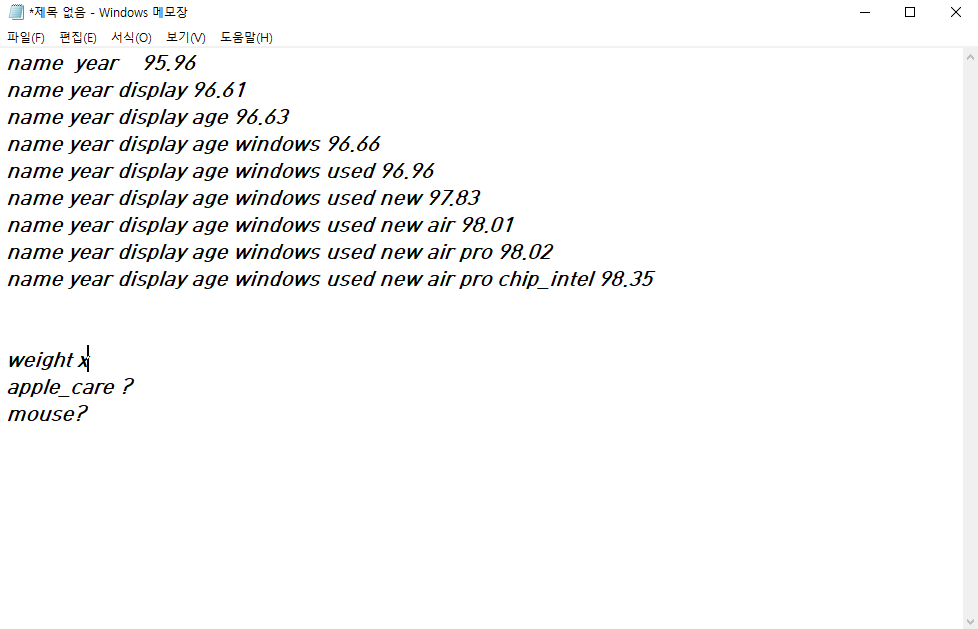